# 7 Days of Code - Alura
## Dia 1

In [44]:
#importing data
import pandas as pd
from datetime import datetime

url = 'https://www.senado.gov.br/transparencia/LAI/verba/despesa_ceaps_'
ceaps = pd.concat(pd.read_csv(url+str(year)+'.csv', encoding='ISO-8859-1', sep=';', skiprows=1, decimal=',') for year in range(2015,2023))

In [54]:
#informações gerais
ceaps.info()
ceaps.describe()
print('# de senadores únicos: ',len(ceaps['SENADOR'].unique()))
print('# de fornecedores únicos: ',len(ceaps['FORNECEDOR'].unique()))
print('# de despesas únicas: ',len(ceaps['TIPO_DESPESA'].unique()))
print('# de anos únicos: ',len(ceaps['ANO'].unique()))
# fonte da solução: https://stackoverflow.com/questions/59236780/how-to-check-for-wrong-datetime-entries-python-pandas
ceaps['DATA_CORRETA'] = pd.to_datetime(ceaps['DATA'], format="%d/%m/%Y", errors='coerce')
date_error_list = ceaps.loc[ceaps['DATA_CORRETA'].isnull()]['DATA'].unique().tolist()
date_error_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160620 entries, 0 to 160619
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              160620 non-null  int64  
 1   ANO                160620 non-null  int64  
 2   MES                160620 non-null  int64  
 3   SENADOR            160620 non-null  object 
 4   TIPO_DESPESA       160620 non-null  object 
 5   CNPJ_CPF           160620 non-null  object 
 6   FORNECEDOR         160620 non-null  object 
 7   DOCUMENTO          149795 non-null  object 
 8   DATA               160620 non-null  object 
 9   DETALHAMENTO       114529 non-null  object 
 10  VALOR_REEMBOLSADO  160620 non-null  float64
 11  COD_DOCUMENTO      160618 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 14.7+ MB
# de senadores únicos:  189
# de fornecedores únicos:  16969
# de despesas únicas:  7
# de anos únicos:  8


['Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;',
 'Companhia Aérea: AVIANCA, Localizador: ZNEU9F. Passageiros: EDUARDO ALVES DO AMORIM (Matrícula 234312, PARLAMENTAR), Voo: 6223 - ARACAJU/BRASÍLIA - 24/08/2015;',
 '06/10/2915',
 '26/08/0201',
 '24/02/5015',
 '22/04/0215',
 '23/04/0215',
 '08/05/5201',
 '20/07/5017',
 '02/04/3016',
 '04/04/0216',
 '31/10/0200',
 '31/10/0206',
 '06/02/1017',
 '30/11/1201',
 '09/11/0201',
 '02/03/0201',
 '13/02/0217',
 '09/05/0208',
 '16/11/1201',
 '31/01/0219',
 '05/05/0202',
 '29/10/0202']

Considerando apenas os anos 2019:2022, tinhamos apenas 3 observações que não eram datas.
Agora começando no ano de 2015, surgiram 23 casos. Dessa vez eu os ajustei manualmente, mas em outra ocasião de maior urgência, essas observações serão deletadas.

In [55]:
# fonte da solução: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
correção = {'Companhia Aérea: TAM, Localizador: YXGDSJ. Passageiros: JOSÉ SILVIO MONTEIRO (Matrícula 188223, COMISSIONADO), Voo: 3538 - BRASÍLIA/ARACAJU - 07/08/2015;': '07/08/2015','Companhia Aérea: AVIANCA, Localizador: ZNEU9F. Passageiros: EDUARDO ALVES DO AMORIM (Matrícula 234312, PARLAMENTAR), Voo: 6223 - ARACAJU/BRASÍLIA - 24/08/2015;': '24/08/2015','06/10/2915': '06/10/2015','26/08/0201': '26/08/2015','24/02/5015':'24/02/2015','22/04/0215':'22/04/2015','23/04/2015':'23/04/2015','08/05/5201':'08/05/2015','20/07/5017':'20/07/2017','02/04/3016':'02/04/2016','04/04/0216':'04/04/2016','31/10/0200':'31/10/2020','31/10/0206':'31/10/2016','06/02/1017':'06/02/2017','30/11/1201':'30/11/2017','13/02/0217':'13/02/2017','09/05/0208':'09/05/2018','16/11/1201':'16/11/2018','31/01/0219':'31/01/2019', '05/05/0202': '05/05/2020', '29/10/0202': '29/10/2020'}
ceaps['DATA_CORRETA'] = ceaps['DATA_CORRETA'].fillna(pd.to_datetime(ceaps['DATA'].map(correção)))
ceaps = ceaps[['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR', 'DOCUMENTO', 'DETALHAMENTO', 'VALOR_REEMBOLSADO', 'COD_DOCUMENTO', 'DATA_CORRETA']]
ceaps.sort_values('DATA_CORRETA').head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA_CORRETA
86710,2018,12,FERNANDO BEZERRA COELHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,OG9CQD,"Companhia Aérea: AZUL, Localizador: OG9CQD. Pa...",471.29,2112441.0,1957-12-19
44002,2016,10,PAULO PAIM,"Locomoção, hospedagem, alimentação, combustíve...",37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,Aquisição de combustível para veículos utiliza...,152.51,2050575.0,1977-10-10
46749,2016,3,ROBERTO REQUIÃO,"Locomoção, hospedagem, alimentação, combustíve...",02.056.402/0001-33,AUTO POSTO MOCELIN LTDA,72499,COMBUSTÍVEL PARA AUTOMÓVEL EM ATIVIDADE PARLAM...,139.16,2033399.0,1986-03-19
90317,2018,4,JOSÉ AGRIPINO,Aquisição de material de consumo para uso no e...,13.165.472/0001-46,FF Distribuidora,00149,NaN,500.00,2098308.0,2001-05-03
14669,2015,11,LÍDICE DA MATA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,KEN9MP,"Companhia Aérea: GOL, Localizador: KEN9MP. Pas...",621.73,2023965.0,2001-10-23


In [48]:
ceaps.reset_index(inplace=True)

C:\Users\Great Victor\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


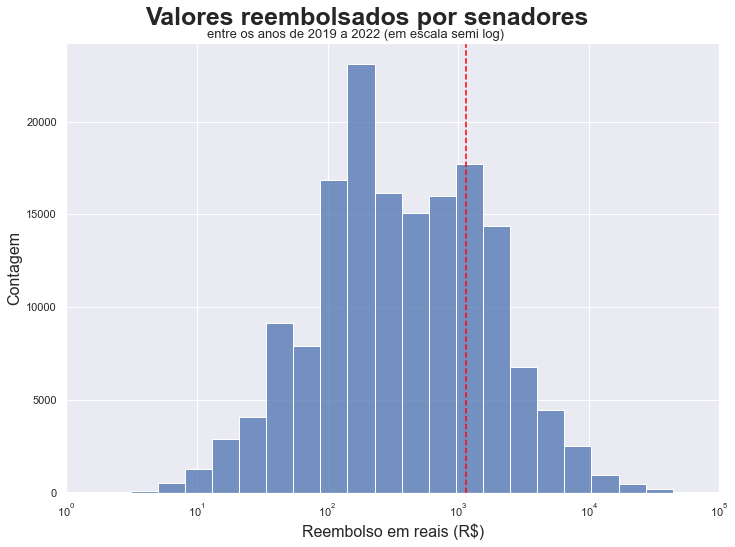

In [53]:
### Gráfico desenvolvido em parceria com Luxirio e ArturCGS
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)}) #aumentar o tamanho do output do gráfico
hist_valor = sns.histplot(data = ceaps, x = "VALOR_REEMBOLSADO", log_scale = True, bins = 40)
hist_valor.text(x = 4, y = 25200, s ="Valores reembolsados por senadores", fontsize = 25, weight = "bold")
hist_valor.text(x = 12, y = 24500, s ="entre os anos de 2015 a 2022 (em escala semi log)", fontsize = 13)
hist_valor.set(xlim=(1,100000))
plt.xlabel( "Reembolso em reais (R$)", fontsize = 16)
plt.ylabel( "Contagem", fontsize = 16)
plt.axvline(ceaps["VALOR_REEMBOLSADO"].mean(), 0,1, color = "red", linestyle="--")

[]

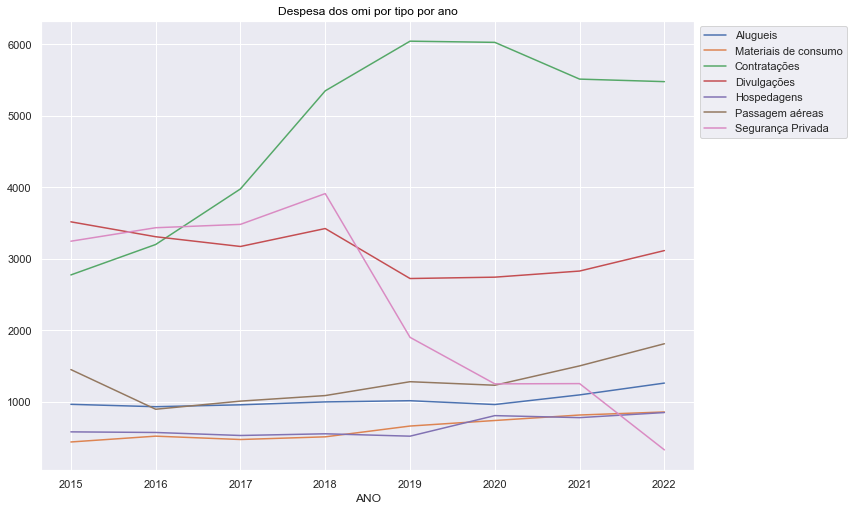

In [46]:
### Gráfico desenvolvido em parceria com @Luxirio e @Beakman
pvt = ceaps.pivot_table(values='VALOR_REEMBOLSADO', index='ANO', columns='TIPO_DESPESA')
pvt.columns = ['Alugueis', 'Materiais de consumo', 'Contratações', 'Divulgações', 'Hospedagens', 'Passagem aéreas', 'Segurança Privada']
pvt_plot = pvt.plot()
pvt_plot.set_title("Despesa dos omi por tipo por ano", color ='black')
pvt_plot.legend(bbox_to_anchor=(1,1))
pvt_plot.plot()